In [ ]:
# get the dataset
!gdown --id 1ICZSHuGuelYu2JtldMzScUQz8Q_JNfAK

/usr/local/lib/python3.10/dist-packages/gdown/cli.py:121: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1ICZSHuGuelYu2JtldMzScUQz8Q_JNfAK
To: /content/ready_dataset.csv
100% 5.16M/5.16M [00:00<00:00, 276MB/s]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, RobustScaler
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score, roc_curve, auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_csv('/content/ready_dataset.csv',index_col=0)

# **EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20000 entries, 0 to 19999
Data columns (total 25 columns):
 #   Column                                              Non-Null Count  Dtype  
---  ------                                              --------------  -----  
 0   userId                                              20000 non-null  object 
 1   productId                                           20000 non-null  object 
 2   model                                               19963 non-null  object 
 3   campaignId                                          20000 non-null  object 
 4   InstallDate                                         20000 non-null  object 
 5   days_since_app_installed                            20000 non-null  int64  
 6   lifetime_app_start_count                            20000 non-null  float64
 7   avg_daily_app_start                                 20000 non-null  float64
 8   days_since_last_start                               20000 non-null  float64


In [ ]:
df.describe()

,days_since_app_installed,lifetime_app_start_count,avg_daily_app_start,days_since_last_start,avg_days_between_app_starts,install_to_open_gap,lifetime_brochur_view_count,avg_daily_brochure_view,commulative_broucher_view_duration_seconds,avg_broucher_view_duration_seconds,days_since_last_brochur_viewed,max_visited_brochure_id,max_visited_brochure_visit_count,max_duration_brochure_id,max_duration_brochure_commulative_duration_seconds,brochure_view_rate_per_app_start,total_page_turn_count,average_page_turn_per_brochur_view
count,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000,2.000000e+04,20000.000000,20000.000000,8.500000e+03,20000.00000,8.500000e+03,20000.000000,20000.00,20000.000000,20000.000000
mean,60.19740,7.073950,0.122588,43.040350,30.751112,0.266050,10.417400,0.175579,1.614968e+04,592.882313,49.512350,6.662625e+08,1.02430,6.724583e+08,3040.245624,inf,168.637650,6.345300
std,17.48381,15.723856,0.263334,27.054601,29.602060,4.070417,30.777601,0.506168,5.191423e+04,1158.500324,25.159002,2.050489e+07,1.72585,1.556471e+07,6733.690756,NaN,524.008815,10.151169
min,30.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,5.416142e+08,0.00000,5.416142e+08,0.000000,0.00,0.000000,0.000000
25%,45.00000,1.000000,0.017857,20.000000,2.996135,0.000000,0.000000,0.000000,0.000000e+00,0.000000,34.000000,6.629162e+08,0.00000,6.657491e+08,0.000000,0.00,0.000000,0.000000
50%,60.00000,2.000000,0.032258,44.000000,19.524260,0.000000,0.000000,0.000000,0.000000e+00,0.000000,52.000000,6.698108e+08,0.00000,6.729544e+08,0.000000,0.00,0.000000,0.000000
75%,75.00000,5.000000,0.097561,66.000000,56.000000,0.000000,6.000000,0.101695,6.016667e+03,875.486975,70.000000,6.790500e+08,2.00000,6.815179e+08,2733.333333,1.55,78.000000,11.539050
max,90.00000,438.000000,6.025641,90.000000,90.000000,90.000000,659.000000,14.051282,1.064181e+06,30083.333333,90.000000,6.974349e+08,23.00000,6.992914e+08,95028.966667,inf,9590.000000,111.000000


(churn        15083
 not_churn     4917
 Name: churn_label, dtype: int64,
 <Axes: >)

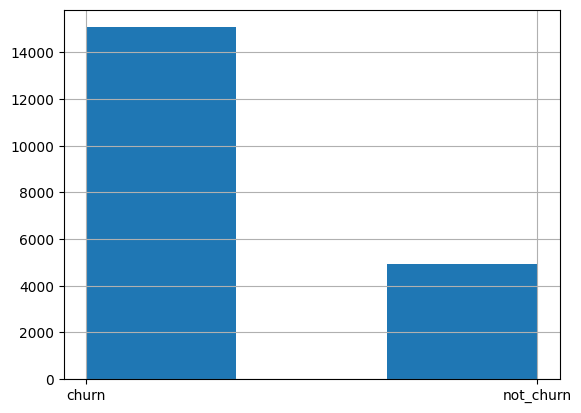

In [ ]:
# class imbalance
df['churn_label'].value_counts(), df['churn_label'].hist(bins=3)

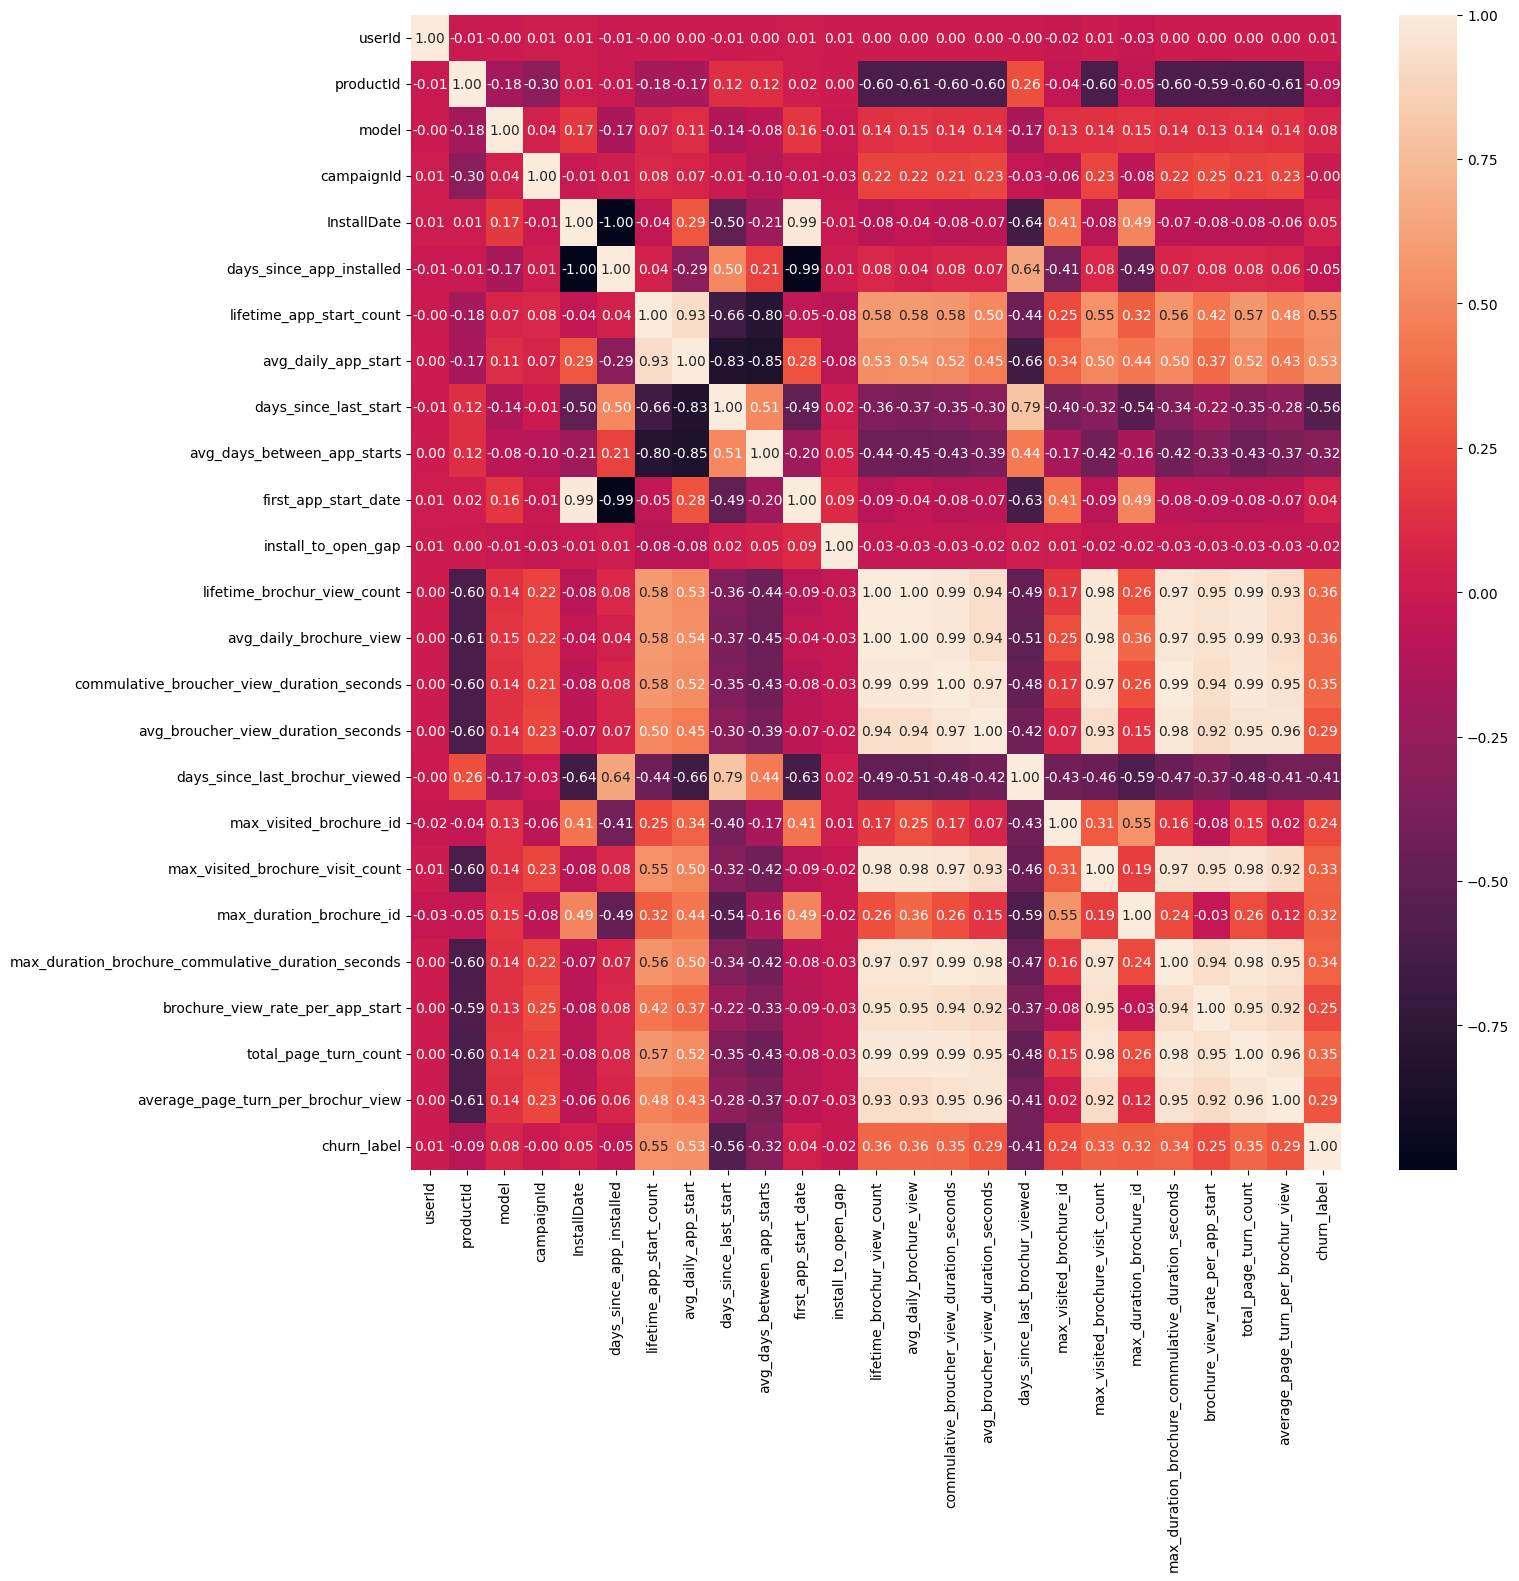

In [ ]:
df2 = df.copy()
le = LabelEncoder()
for col in df2.select_dtypes(include=['object']).columns:
    df2[col] = le.fit_transform(df2[col]).astype('float64')
plt.figure(figsize=(15, 15))  # Adjust size here
sns.heatmap(df2.corr(method='spearman',numeric_only=True), annot=True, fmt='.2f')
plt.show()

# we can remove correlated features Based on:
  # Interpretability: If one feature is easier to interpret or explain than the other, you might choose to keep it.
  # Relevance: If one feature is more relevant to your target variable (churn), you might choose to keep it.
  # Data Quality: If one feature has more reliable or complete data than the other, you might choose to keep it.
# hot correlinear features ['total_page_turn_count','max_duration_brochure_commulative_duration_seconds','max_visited_brochure_visit_count','brochure_view_rate_per_app_start','average_page_turn_per_brochur_view','userId','InstallDate','first_app_start_date','avg_daily_brochure_view','commulative_broucher_view_duration_seconds','avg_daily_app_start','avg_broucher_view_duration_seconds'], axis=1,inplace=True)

Insight: Correlation mostly existed in brochure related problem.
Let's check lifetime_borchure_view_count' distribution as this is the base of brochur features mostly.

In [ ]:
print('top 5 lifetime_borchure_view_count distribution \n{}'.format(df['lifetime_brochur_view_count'].value_counts(normalize=True)[:5]))

top 5 lifetime_borchure_view_count distribution 
0.0    0.57500
1.0    0.05135
2.0    0.03725
3.0    0.03085
4.0    0.02350
5.0    0.02255
Name: lifetime_brochur_view_count, dtype: float64


**lifetime_borchur_view_count=0** is dominating the dataset.
Looks like it's playing a key role in causing high correlation in the matrix

Moreover, this creating bias in the dataset.

Hypothesis: lifetime_borchure_view_count=0 could very much mean churn (as per our definition of churn).
Let's see

In [ ]:
print(df.value_counts(['lifetime_brochur_view_count','churn_label'],normalize=True))

lifetime_brochur_view_count  churn_label
0.0                          churn          0.48905
                             not_churn      0.08595
1.0                          churn          0.04550
2.0                          churn          0.03260
3.0                          churn          0.02530
                                             ...   
91.0                         churn          0.00005
171.0                        not_churn      0.00005
169.0                        not_churn      0.00005
95.0                         churn          0.00005
659.0                        not_churn      0.00005
Length: 393, dtype: float64


Yes, users with lifetime_borchure_view_count=0 mostly belong to churn class.

Now, let's see down sampling could help in Class balancing, removing bias and lower the correlation.

(churn        5802
 not_churn    4917
 Name: churn_label, dtype: int64,
 <Axes: >)

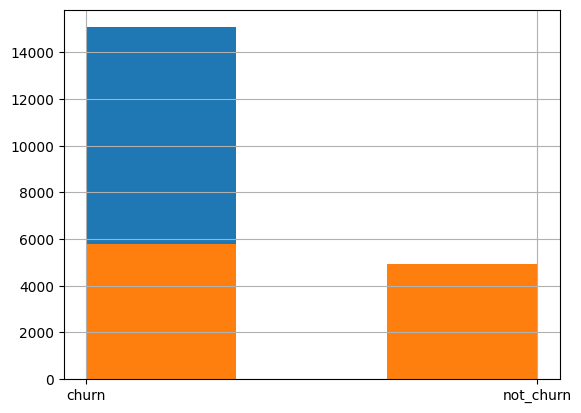

In [ ]:
# blue: Histogram before removal
df['churn_label'].hist(bins=3)

'''
Keeping a random sample of 500 from the entries with 0 brochure visits.
This would be enough to represent user segement.
'''
to_remove = df[(df['lifetime_brochur_view_count'] == 0) & (df['churn_label'] == 'churn')]
to_keep = to_remove.sample(n=500)
filtered_df = df.drop(to_remove.index).append(to_keep)

# orange: Histogram after removal
filtered_df['churn_label'].value_counts(), filtered_df['churn_label'].hist(bins=3)

As expected, class balance increased. Let's now check correlation.


(10719, 25)


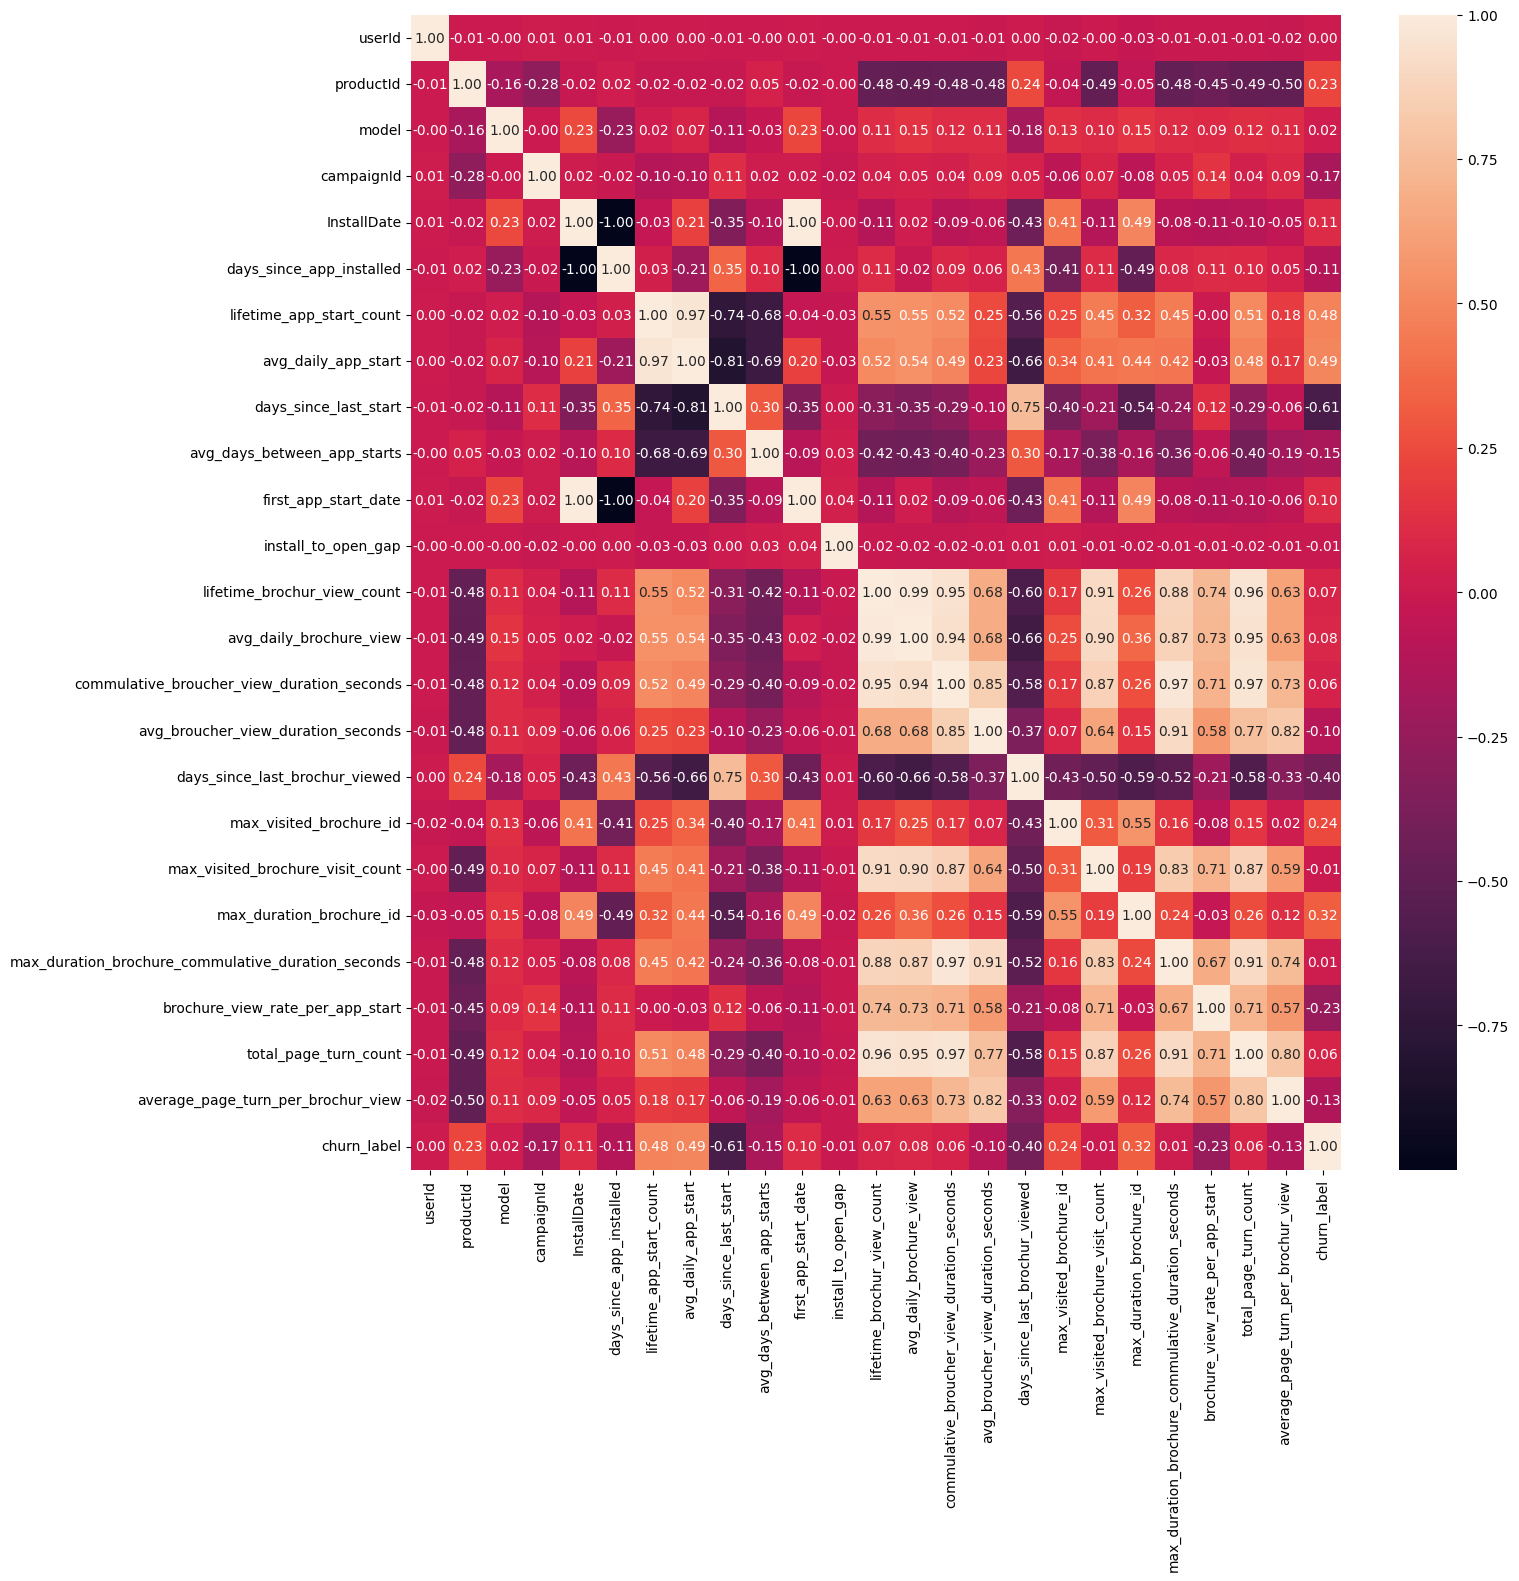

In [ ]:
df2 = filtered_df.copy()
# df2.drop(['max_visited_brochure_visit_count','total_page_turn_count','max_duration_brochure_commulative_duration_seconds','commulative_broucher_view_duration_seconds','avg_daily_brochure_view','avg_daily_app_start','first_app_start_date', 'userId','InstallDate'], axis=1,inplace=True)
print(df2.shape)
le = LabelEncoder()
for col in df2.select_dtypes(include=['object']).columns:
    df2[col] = le.fit_transform(df2[col]).astype('float64')
plt.figure(figsize=(15, 15))  # Adjust size here
sns.heatmap(df2.corr(method='spearman'), annot=True, fmt='.2f')
plt.show()

Correlation also reduced significantly.

# **Feature Engineering**

**To avoid Multicollinearity drop features based on:**


*   **Interpretability**: If one feature is easier to interpret or explain than the other, you might choose to keep it.
*   **Relevance**: If one feature is more relevant to your target variable (churn), you might choose to keep it.
*   **Data Quality:** If one feature has more reliable or complete data than the other, you might choose to keep it.

In [ ]:
# dropping features with least contribution to label and extremely high correlation as discussed in EDA.
df.drop(['max_visited_brochure_visit_count','total_page_turn_count','max_duration_brochure_commulative_duration_seconds','commulative_broucher_view_duration_seconds','avg_daily_brochure_view','avg_daily_app_start','first_app_start_date', 'userId','InstallDate'], axis=1,inplace=True)

In [ ]:
# renaming columns
df.rename(columns={'productId':'product_id', 'model':'device_model', 'campaignId':'campaign_id',
'days_since_last_start':'days_since_last_app_start','install_to_open_gap':'install_to_app_start_days',
'days_since_last_brochur_viewed':'days_since_last_brochure_viewed'},inplace=True)

In [ ]:
# fill missing
df['max_visited_brochure_id'].fillna(-1, inplace=True)
df['max_duration_brochure_id'].fillna(-1, inplace=True)
df['device_model'].fillna('unknown',inplace=True)

# Replace infinite values with 0
df.replace([np.inf, -np.inf], 0, inplace=True)

In [ ]:
# fix data types
df['max_visited_brochure_id'] = df['max_visited_brochure_id'].astype('int')
df['max_duration_brochure_id'] = df['max_duration_brochure_id'].astype('int')
df['days_since_app_installed'] = df['days_since_app_installed'].astype('float64')

As diccussed in previous section, Down-sampling to decrease correlation, class imbalance and data bias.

In [ ]:
# balacing data (removing bias)
to_remove = df[(df['lifetime_brochur_view_count'] == 0) & (df['churn_label'] == 'churn')]
to_keep = to_remove.sample(n=500)
df = df.drop(to_remove.index).append(to_keep)
df.shape

(10719, 16)

In [ ]:
# Data Encoding
le = LabelEncoder()
categorical_columns = ['product_id','device_model','campaign_id','max_visited_brochure_id','max_duration_brochure_id','churn_label']
for col in categorical_columns:
    df[col] = le.fit_transform(df[col]).astype('float64')

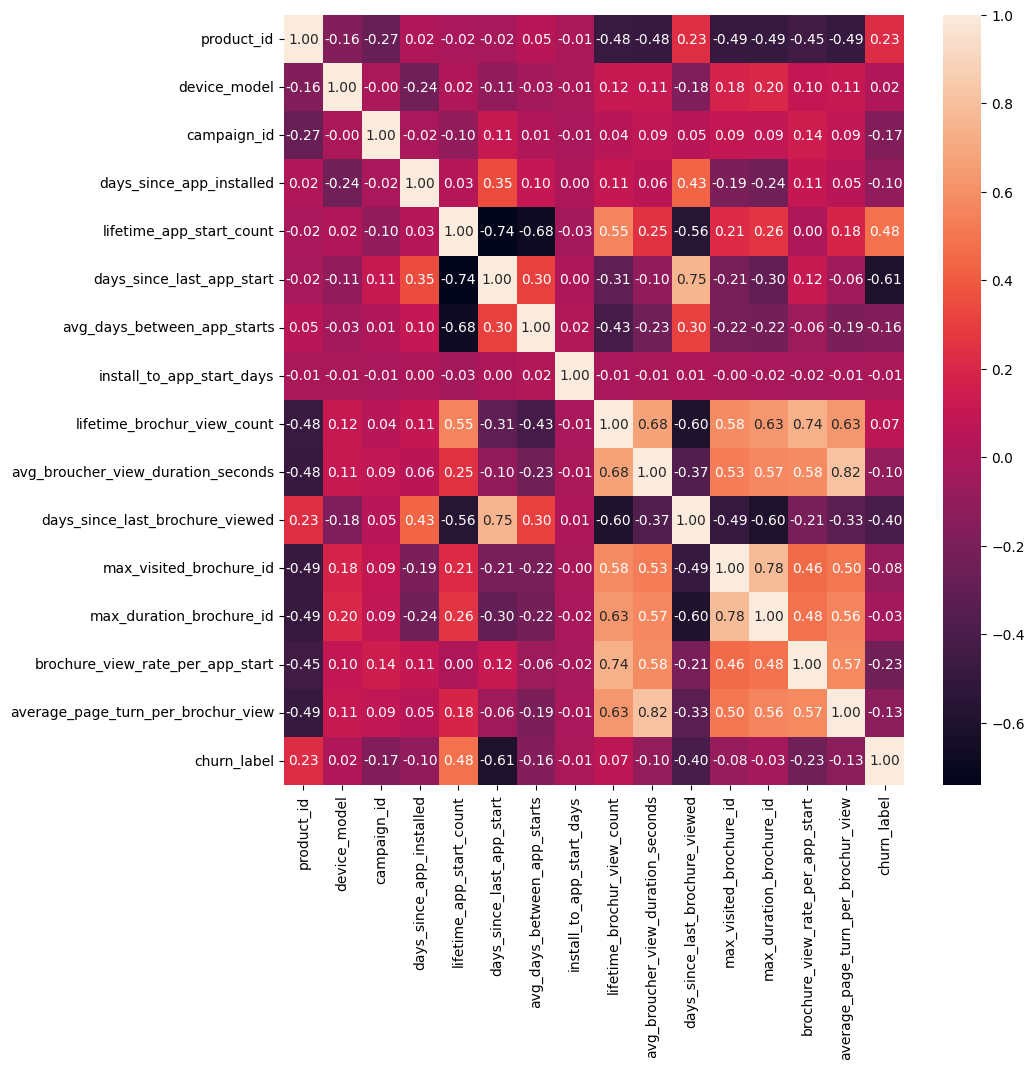

In [ ]:
plt.figure(figsize=(10, 10))  # Adjust size here
sns.heatmap(df.corr(method='spearman',numeric_only=True), annot=True, fmt='.2f')
plt.show()

In [ ]:
# Feature Selection

# from sklearn.feature_selection import RFE
# from sklearn.ensemble import RandomForestClassifier

# # Your data
# X = df.drop('churn_label', axis=1)
# y = df['churn_label']

# # Initialize model
# model = RandomForestClassifier()

# # Initialize RFE
# rfe = RFE(estimator=model, n_features_to_select=10)  # Choose the top 10 features

# # Fit RFE
# X_rfe = rfe.fit_transform(X, y)

# # Features ranking
# feature_ranking = pd.Series(rfe.ranking_, index=X.columns)

# # Top features
# top_features = X.columns[rfe.support_]
# print(top_features)

In [ ]:
# import matplotlib.pyplot as plt
# # lifetime_app_start_count,lifetime_brochur_view_count, avg_days_between_app_starts, avg_broucher_view_duration_seconds, brochure_view_rate_per_app_start, average_page_turn_per_brochur_view

# f = 'brochure_view_rate_per_app_start'
# plt.hist(df[f], bins=50)
# plt.xlabel(f)
# plt.ylabel('Frequency')
# plt.title(f'Distribution of {f}')
# plt.show()

# **Preprocessing**

In [ ]:
# # # Data normalization
# scaler = MinMaxScaler()

# # Select columns to scale
# columns_to_scale = df.columns

# df[columns_to_scale] = scaler.fit_transform(df[columns_to_scale])

In [ ]:
# Initialize RobustScaler
robust_scaler = RobustScaler()

# Identify columns to scale
columns_to_scale = df.columns

# Apply RobustScaler to the columns with outliers
df[columns_to_scale] = robust_scaler.fit_transform(df[columns_to_scale])

# Identify skewed columns; replace this list with your specific skewed columns
skewed_columns = ['lifetime_app_start_count','lifetime_brochur_view_count', 'avg_days_between_app_starts', 'avg_broucher_view_duration_seconds', 'brochure_view_rate_per_app_start', 'average_page_turn_per_brochur_view']  # Replace with your actual skewed columns

# Apply log transformation to skewed features, adding 1 to shift from zero
for col in skewed_columns:
    df[col] = np.log1p(df[col])

In [ ]:
# validation splitting
features = df.drop('churn_label', axis=1)
labels = df['churn_label']

X_train, X_val, y_train, y_val = train_test_split(features, labels, test_size=0.2, random_state=42)

# **Training**

In [ ]:
# Define parameter grid
# param_grid = {
#     'n_estimators': [50, 100, 200],
#     'max_depth': [10, 20, 30],
#     'min_samples_split': [2, 5, 10],
#     'random_state': [42]
# }
param_grid = {
    'n_estimators': [10, 50, 100, 150, 200],
    'max_depth': [5, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 3, 4, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False],
    'criterion': ['gini', 'entropy'],
    'random_state': [42]
}


# Create a Random Forest Classifier
rf_clf = RandomForestClassifier()

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_clf, param_grid=param_grid,
                           scoring=make_scorer(accuracy_score), cv=5)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Get best parameters and estimator
best_params = grid_search.best_params_
best_estimator = grid_search.best_estimator_

print("Best Parameters:", best_params)

Best Parameters: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 200, 'random_state': 42}

In [ ]:
# Initialize and train the model
rf_clf = RandomForestClassifier(n_estimators=200, max_depth=10, min_samples_split=10, random_state=42)

In [ ]:
rf_clf.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions
y_pred = rf_clf.predict(X_val)
y_pred_proba = rf_clf.predict_proba(X_val)[:,1]

In [ ]:
# Evaluate the model
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f'Validation Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')

Validation Accuracy: 0.8302238805970149
F1 Score: 0.8129496402877698
ROC AUC Score: 0.9085796293691539
Precision: 0.8054989816700611
Recall: 0.8205394190871369


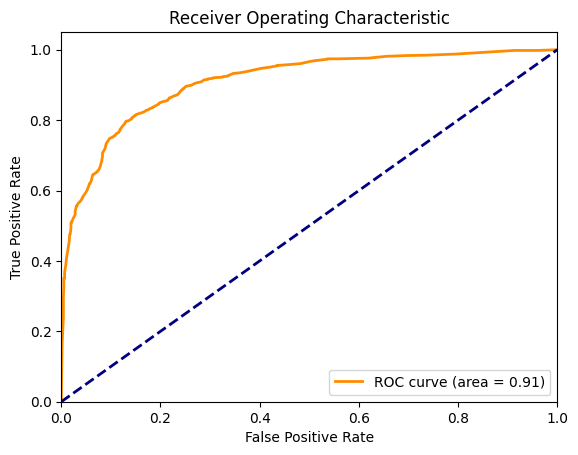

In [ ]:
# Compute ROC curve and AUC
fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Plot
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange', lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

# **Some other models**

Naive bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

# Gaussian Naive Bayes
gnb_clf = GaussianNB()
gnb_clf.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = gnb_clf.predict(X_val)
y_pred_proba = gnb_clf.predict_proba(X_val)[:,1]

# Evaluate the model
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f'Validation Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


LogisticRegression

In [ ]:
from sklearn.linear_model import LogisticRegression

# Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

SVC()

In [ ]:
# Make predictions
y_pred = log_reg.predict(X_val)
y_pred_proba = log_reg.predict_proba(X_val)[:,1]

# Evaluate the model
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred_proba)

print(f'Validation Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Validation Accuracy: 0.8017723880597015
F1 Score: 0.7750132345156168
ROC AUC Score: 0.8708343589563261
Precision: 0.7913513513513514
Recall: 0.7593360995850622


Try SVM

In [ ]:
from sklearn.svm import SVC
# SVM
svm_clf = SVC()
svm_clf.fit(X_train, y_train)

In [ ]:
# Make predictions
y_pred = svm_clf.predict(X_val)
# y_pred_proba = svm_clf.predict_proba(X_val)[:,1]

# Evaluate the model
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

print(f'Validation Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Validation Accuracy: 0.7700559701492538
F1 Score: 0.7496190959878111
ROC AUC Score: 0.7696444897672128
Precision: 0.7343283582089553
Recall: 0.7655601659751037


XGBoost

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, roc_auc_score

# XGBoost
xgb_clf = XGBClassifier()
xgb_clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [ ]:

y_pred = xgb_clf.predict(X_val)

# Evaluate the model
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

print(f'Validation Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Validation Accuracy: 0.8274253731343284
F1 Score: 0.8074921956295525
ROC AUC Score: 0.82537098248822
Precision: 0.8100208768267223
Recall: 0.8049792531120332


In [ ]:
from lightgbm import LGBMClassifier

# LightGBM
lgbm_clf = LGBMClassifier()
lgbm_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 3953, number of negative: 4622
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002666 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2583
[LightGBM] [Info] Number of data points in the train set: 8575, number of used features: 15
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.460991 -> initscore=-0.156353
[LightGBM] [Info] Start training from score -0.156353


LGBMClassifier()

In [ ]:
y_pred = lgbm_clf.predict(X_val)

# Evaluate the model
precision = precision_score(y_val, y_pred)
recall = recall_score(y_val, y_pred)
accuracy = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred)
roc_auc = roc_auc_score(y_val, y_pred)

print(f'Validation Accuracy: {accuracy}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')


Validation Accuracy: 0.832089552238806
F1 Score: 0.8157625383828044
ROC AUC Score: 0.83160208172164
Precision: 0.805050505050505
Recall: 0.8267634854771784
